In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#df = pd.read_excel('C:/Users/Alexey/Downloads/accidents.xlsx')
#df.columns = ['date', 'time', 'process', 'organisation', 'PO_name', 'sub_names', 'location', 
#             'category', 'production', 'law_class', 'danger_class', 'accident_number',
#             'production_component', 'equipment_type', 'operation_type', 'risk_1',
#             'risk_2', 'risk_3', 'responsible']
#df.loc[df['time'] == "18:45 (Уф)", 'time'] = pd.to_datetime('18:45:00', format='%H:%M:%S').time()
#df.loc[df['time'] == "08.00", 'time'] = pd.to_datetime('08:00:00', format='%H:%M:%S').time()
#df.to_csv('C:/Users/Alexey/Downloads/filtered_accidents.csv')

In [49]:
df = pd.read_csv('C:/Users/Alexey/Downloads/filtered_accidents.csv')
df = df.drop('Unnamed: 0', axis=1)

In [50]:
df = df.assign(date = df.date + ' ' + df.time)

In [51]:
df.date = df.date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'))

In [53]:
df = df.drop('time', axis=1)

In [68]:
df = df.assign(month = df.date.dt.month)

In [97]:
df

,date,process,organisation,PO_name,sub_names,location,category,production,law_class,danger_class,accident_number,production_component,equipment_type,operation_type,risk_1,risk_2,risk_3,responsible,month
0,2016-01-07 16:10:00,переработка,"Филиал ""Башнефть-Новойл""",нет,нет,"Топливное производство, установка 21-10",незначительное,да,инцидент,Не потенциально опасное,973-07.01.16-НП-ПиК,Оборудование и процессы на объектах нефтеперер...,технологические трубопроводы,эксплуатация оборудования,Отказ / повреждение / разрушение статического ...,нет,нет,ДО/филиал,1
1,2016-01-12 15:00:00,нефтехимия,"ПАО ""Уфаоргсинтез""",нет,нет,"Производство полиэтилена, Производство полиэти...",незначительное,да,инцидент,Не потенциально опасное,974-12.01.16-НП-ПиК,Оборудование и процессы на объектах нефтеперер...,"резервуары, емкости, колонны, реакторы",эксплуатация оборудования,NaN,NaN,NaN,ДО/филиал,1
2,2016-01-02 06:00:00,переработка,"Филиал ""Башнефть-Уфанефтехим""",нет,нет,"газокаталитическое производство, установка 24/7",незначительное,да,инцидент,Не потенциально опасное,975-02.01.16-НП-ПиК,Оборудование и процессы на объектах нефтеперер...,"технологические установки (в т.ч. насосные, ко...",эксплуатация оборудования,Отказ / повреждение / разрушение динамическог...,нет,нет,ДО/филиал,1
3,2016-01-04 23:20:00,сбыт,ООО «Башнефть-Розница» (РО Челябинск),нет,нет,"АЗС 45-26, г. Курган а/д Курган-Звериноголовск...",незначительное,да,нет,Не потенциально опасное,976-04.01.16-НП-ПиК,Энергетика,АЗС,эксплуатация оборудования,Отказ / повреждение / разрушение статического ...,нет,нет,ДО/филиал,1
4,2016-01-04 05:50:00,переработка,"Филиал ""Башнефть-Уфанефтехим""",нет,нет,"газокаталитическое производство, установка 24/7",незначительное,да,инцидент,Не потенциально опасное,977-04.01.16-НП-ПиК,Оборудование и процессы на объектах нефтеперер...,"технологические установки (в т.ч. насосные, ко...",эксплуатация оборудования,Отказ / повреждение / разрушение динамическог...,нет,нет,ДО/филиал,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2016-04-05 10:30:00,переработка,"ООО ""Туймазинское ГПП""",нет,нет,Заводоуправление,незначительное,нет,нет,Не потенциально опасное,1069-05.04.16-НП-ПиК,Медицинская помощь,административные здания,NaN,"Ухудшение состояние здоровья, не связанное с п...",нет,нет,NaN,4
82,2016-04-06 10:27:00,переработка,"Филиал ""Башнефть-Уфанефтехим""",нет,нет,"топливное производство, установка «Висбрекинг»",незначительное,да,инцидент,не потенциально опасное,1070-06.04.16-НП-ПиК,Оборудование и процессы на объектах нефтеперер...,"технологические установки (в т.ч. насосные, ко...",эксплуатация оборудования,Отказ / повреждение / разрушение динамическог...,нет,нет,NaN,4
83,2016-04-06 08:00:00,переработка,"Филиал ""Башнефть-Уфанефтехим""",нет,нет,"""Гидрокрекинг"" (УРК), Газокаталитическое произ...",незначительное,нет,нет,Не потенциально опасное,1071-06.04.16-НП-ПиК,Медицинская помощь,NaN,NaN,"Ухудшение состояние здоровья, не связанное с п...",нет,нет,NaN,4
84,2016-04-07 08:30:00,сбыт,ООО «Башнефть-Розница» (РО Башкирия),нет,а/м Хонда АККОРД,"г. Уфа, ул. Уфимское шоссе, 26",легкое,да,ДТП,Не потенциально опасное,1072-07.04.16-ЛП-ПиК,Транспорт Автомобильный,NaN,NaN,ДТП грузового транспорта,нет,нет,NaN,4


In [87]:
test = df.pivot_table(index=['organisation', 'category'], values='location', aggfunc='count').reset_index()
test

,organisation,category,location
0,"ООО ""Башнефть-Сервис НПЗ""",незначительное,3
1,"ООО ""Туймазинское ГПП""",незначительное,1
2,ООО «Башнефть-Розница» (РО Башкирия),крупное,1
3,ООО «Башнефть-Розница» (РО Башкирия),легкое,3
4,ООО «Башнефть-Розница» (РО Башкирия),незначительное,1
5,ООО «Башнефть-Розница» (РО Оренбург),значительное,1
6,ООО «Башнефть-Розница» (РО Оренбург),легкое,1
7,ООО «Башнефть-Розница» (РО Приволжье),крупное,1
8,ООО «Башнефть-Розница» (РО Удмуртия),значительное,1
9,ООО «Башнефть-Розница» (РО Удмуртия),легкое,2


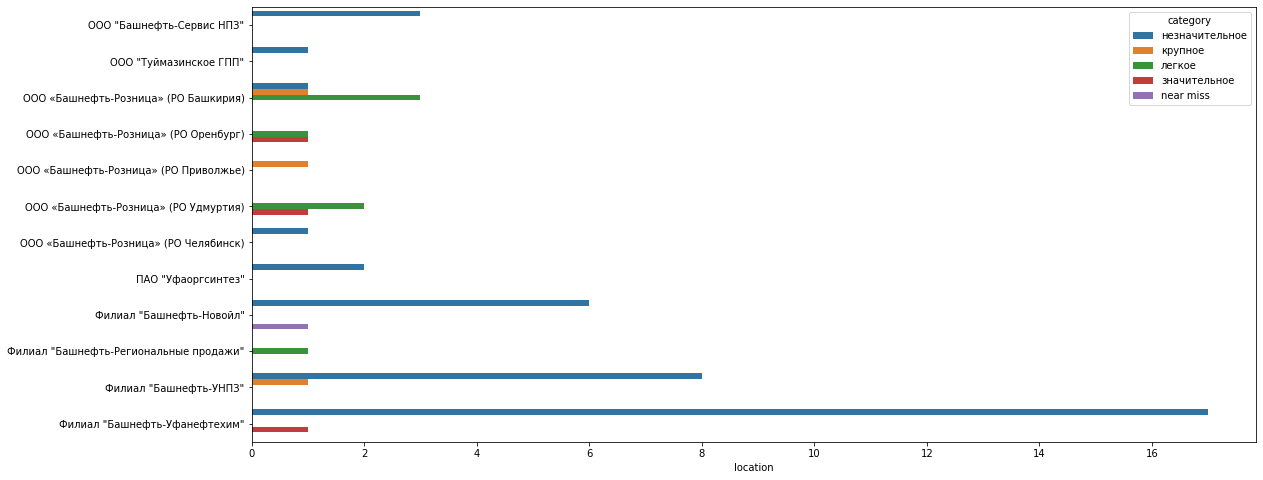

In [96]:
plt.figure(figsize=(18,8))
ax = sns.barplot(y='organisation', data=test, x='location', hue='category', orient='h')
ax.set_ylabel('');

In [100]:
test = df.pivot_table(index=['month', 'law_class'], values='location', aggfunc='count').reset_index()
test

,month,law_class,location
0,1,ДТП,4
1,1,внешнее воздействие,1
2,1,инцидент,6
3,1,нет,7
4,2,ДТП,1
5,2,инцидент,12
6,2,нет,12
7,3,ДТП,5
8,3,авария,1
9,3,инцидент,17


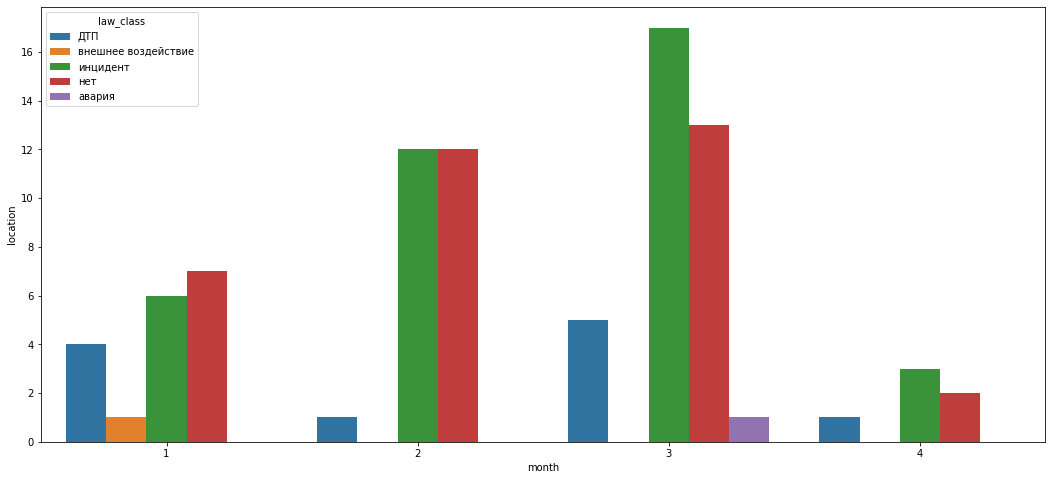

In [112]:
plt.figure(figsize=(18,8))
sns.barplot(data=test, x="month", y="location", hue='law_class', ci=None)
plt.show();

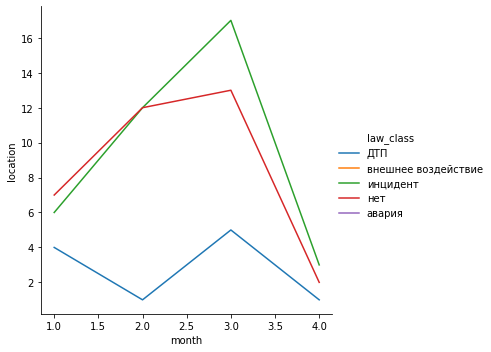

In [115]:
sns.relplot(data=test, x="month", y="location", hue='law_class', kind='line')

In [118]:
test = df.pivot_table(index=['month', 'process'], values='location', aggfunc='count').reset_index()
test

,month,process,location
0,1,другое,3
1,1,нефтехимия,1
2,1,переработка,7
3,1,сбыт,4
4,1,транспортировка,3
5,2,нефтехимия,3
6,2,переработка,20
7,2,сбыт,1
8,2,транспортировка,1
9,3,нефтехимия,1


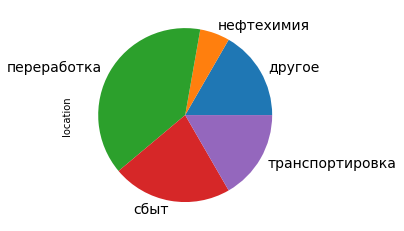

In [122]:
test.query('month == 1').plot(kind='pie', y='location', legend=False, fontsize=14, labels=test.query('month == 1').process);

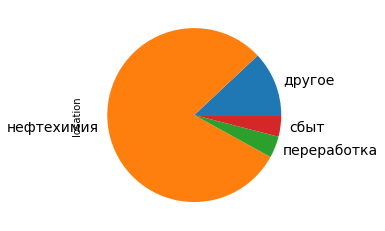

In [123]:
test.query('month == 2').plot(kind='pie', y='location', legend=False, fontsize=14, labels=test.query('month == 1').process);

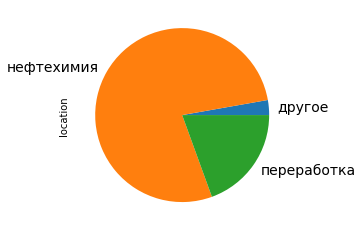

In [124]:
test.query('month == 3').plot(kind='pie', y='location', legend=False, fontsize=14, labels=test.query('month == 1').process);

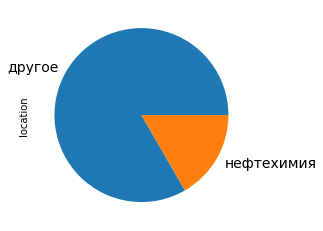

In [125]:
test.query('month == 4').plot(kind='pie', y='location', legend=False, fontsize=14, labels=test.query('month == 1').process);